In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno


In [ ]:

from google.colab import files
import pandas as pd
import io


uploaded = files.upload()


filename = next(iter(uploaded))
df = pd.read_csv(io.StringIO(uploaded[filename].decode('utf-8')))
print(f"File '{filename}' uploaded successfully.")


Saving transactions_fixed.csv to transactions_fixed.csv
File 'transactions_fixed.csv' uploaded successfully.


In [ ]:
# Check shape and basic info
print("Number of rows and columns:", df.shape)
df.info()


Number of rows and columns: (10000, 28)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 28 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   transaction_id                     10000 non-null  object 
 1   user_id                            10000 non-null  object 
 2   timestamp_initiated                10000 non-null  object 
 3   amount                             10000 non-null  float64
 4   transaction_type                   9897 non-null   object 
 5   recipient_type                     9999 non-null   object 
 6   recipient_account_id               9994 non-null   object 
 7   recipient_bank_name_or_ewallet     9883 non-null   object 
 8   device_id                          10000 non-null  object 
 9   location_coordinates               10000 non-null  object 
 10  simulated_network_latency          10000 non-null  int64  
 11  status_timestam

In [ ]:
# Check for duplicates
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

# Check for missing values per column
print("Missing values per column:")
print(df.isnull().sum())


Number of duplicate rows: 0
Missing values per column:
transaction_id                          0
user_id                                 0
timestamp_initiated                     0
amount                                  0
transaction_type                      103
recipient_type                          1
recipient_account_id                    6
recipient_bank_name_or_ewallet        117
device_id                               0
location_coordinates                    0
simulated_network_latency               0
status_timestamp_1                      0
status_1                                0
status_timestamp_2                      0
status_2                                0
status_timestamp_3                      0
status_3                                0
status_timestamp_4                      3
status_4                                0
expected_completion_time               67
is_floating_cash                        0
floating_duration_minutes               0
is_fraudulent_attempt

In [ ]:
# Summary statistics for numeric columns
df.describe()


,amount,simulated_network_latency,floating_duration_minutes
count,10000.000000,10000.00000,10000.000000
mean,4100.256237,2731.75000,20.762600
std,3124.104808,1557.69819,210.930999
min,10.000000,50.00000,0.000000
25%,830.407500,1543.50000,0.000000
50%,3657.380000,2941.00000,0.000000
75%,7153.070000,4393.00000,0.000000
max,25000.000000,4991.00000,8700.000000


In [ ]:
# Show value counts for object (categorical) columns
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"Value counts for '{col}':")
    print(df[col].value_counts().head(10))  # Top 10 values
    print("-" * 50)


Value counts for 'transaction_id':
transaction_id
1b2c3d4e-5f6a-7b8c-9d0e-1f2a3b4c5d6e    12
0a1b2c3d-4e5f-6a7b-8c9d-0e1f2a3b4c5d    11
a1b2c3d4-e5f6-7890-1234-567890abcdef     9
5f6a7b8c-9d0e-1f2a-3b4c-5d6e7f8a9b0c     9
a1b2c3d4-e5f6-7a8b-9c0d-1e2f3a4b5c6d     8
2c3d4e5f-6a7b-8c9d-0e1f-2a3b4c5d6e7f     6
1e2f3a4b-5c6d-7e8f-9a0b-c1d2e3f4a5b6     6
529738c8-f80e-43cd-8884-25916b321a5b     6
3d4e5f6a-7b8c-9d0e-1f2a-3b4c5d6e7f8a     6
a1b2c3d4-e5f6-7890-1234-56789abcdef0     5
Name: count, dtype: int64
--------------------------------------------------
Value counts for 'user_id':
user_id
user_1     239
user_2     238
user_8     236
user_4     234
user_5     233
user_9     231
user_6     230
user_3     226
user_10    221
user_7     216
Name: count, dtype: int64
--------------------------------------------------
Value counts for 'timestamp_initiated':
timestamp_initiated
2023-10-27 10:04:15    38
2023-11-19 19:40:02    34
2023-10-27 10:30:00    32
2023-10-27 10:00:00    30
2023-10-27 10:34

In [ ]:
# Check total number of rows
print(f"Total number of rows: {len(df)}")

# Check number of duplicate rows
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")


Total number of rows: 10000
Number of duplicate rows: 0


                         transaction_id     user_id  timestamp_initiated  \
0  fedcba98-7654-3210-abcd-ef0123456789   user_7758  2024-05-07 19:40:48   
1  a8b7c6d5-e4f3-2c1b-a0d9-8e7f6a5b4c3d  user_19632  2023-10-27 10:17:15   
2  b36ce980-b772-46a4-9e32-b7e1ce171120  user_38848  2023-10-27 16:11:37   
3  b9c8b5f7-e9g0-5d31-0b2d-4g5d6e7f8g9h      user_8  2024-07-28 09:21:40   
4  90e664ee-6998-4384-95a9-4b8c7fc444a1  user_43694  2023-11-20 03:28:16   

    amount                 transaction_type      recipient_type  \
0   103.35          Bank to e-Wallet (Maya)       New Recipient   
1  1500.00          Auto-Reversal Processed  Frequent Recipient   
2   890.10       Internal Vybe App Transfer  Frequent Recipient   
3  7497.00  Bills Payment (via Vybe Wallet)  Frequent Recipient   
4   750.25          Bank to Bank (InstaPay)  Frequent Recipient   

  recipient_account_id recipient_bank_name_or_ewallet  \
0         254133917462                Various Billers   
1          09664539655    

<Figure size 1000x400 with 0 Axes>

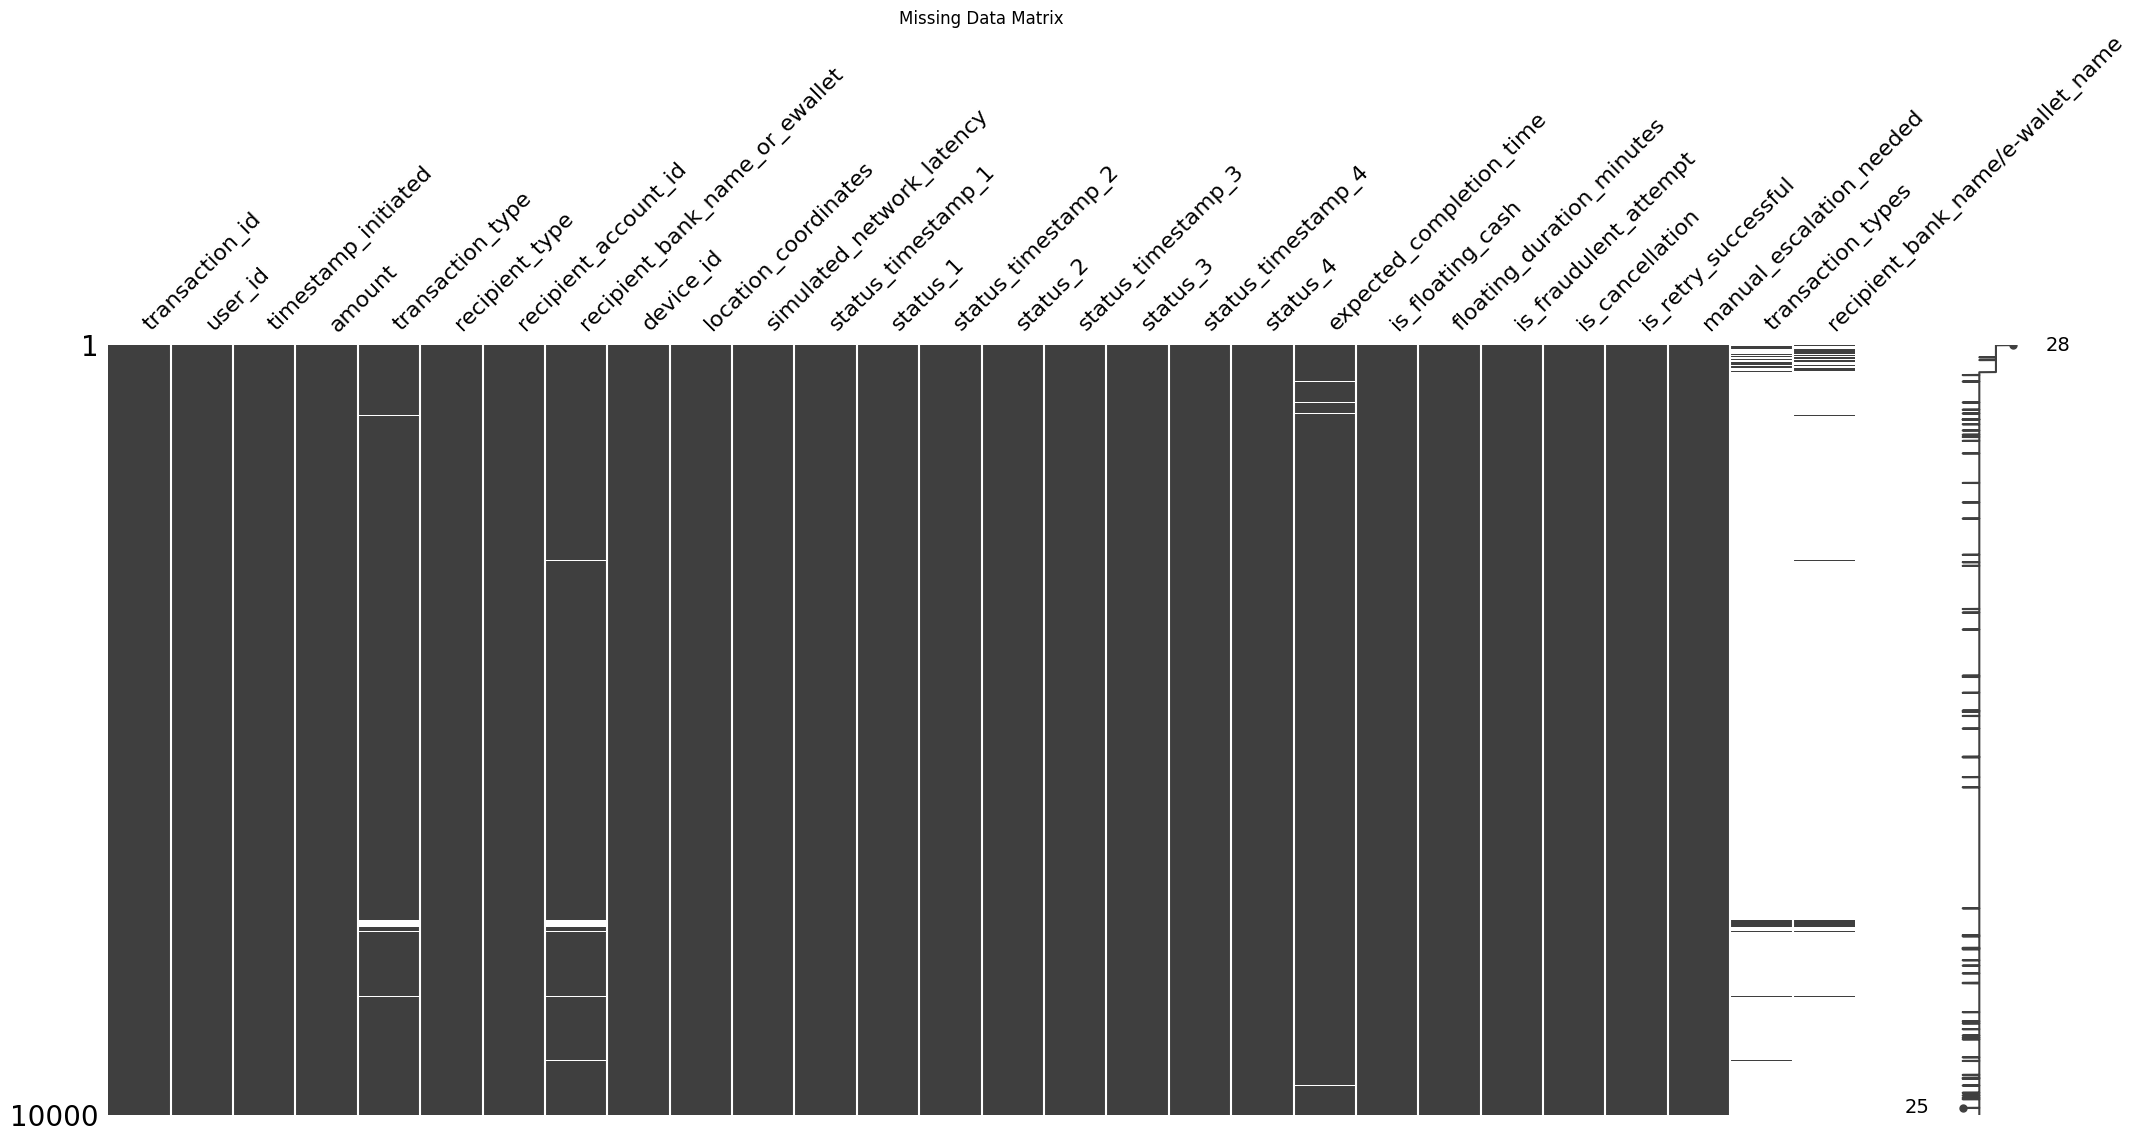

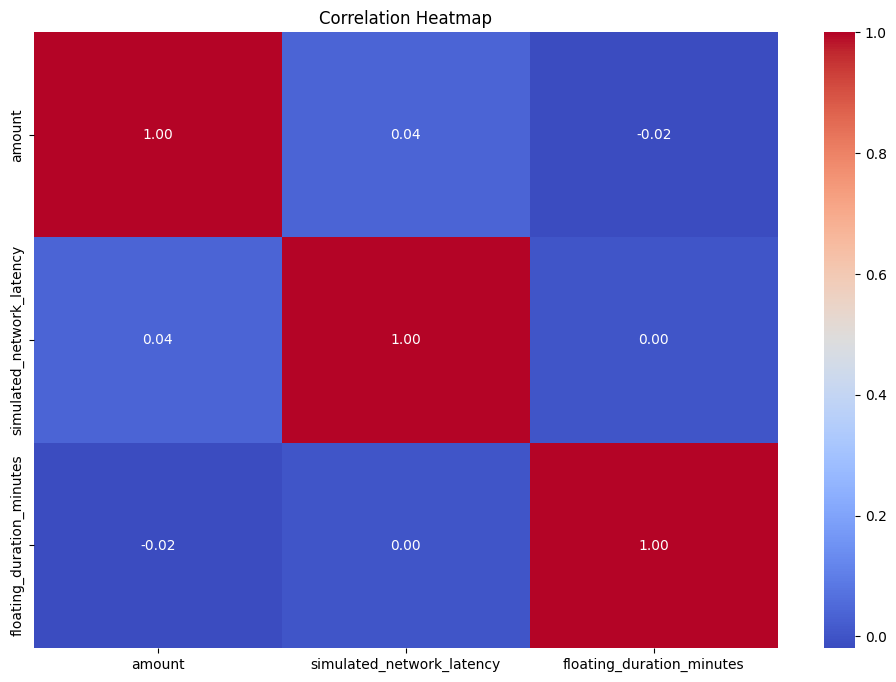

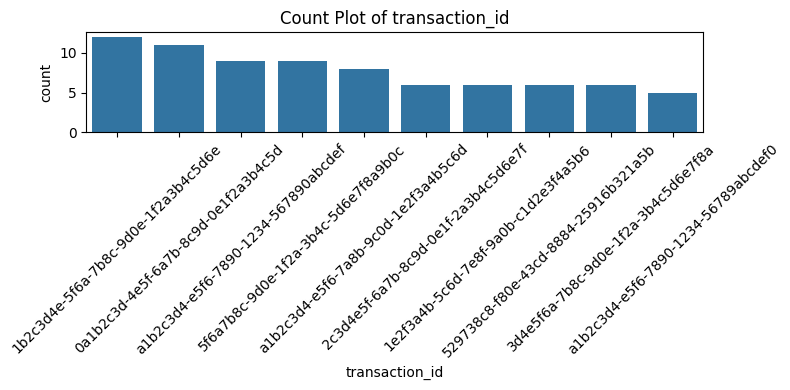

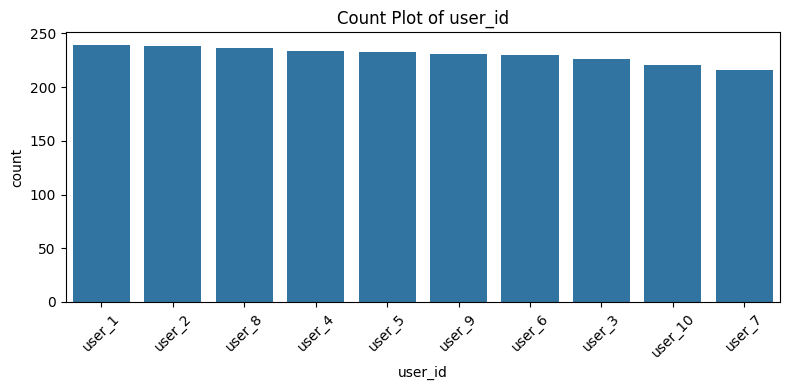

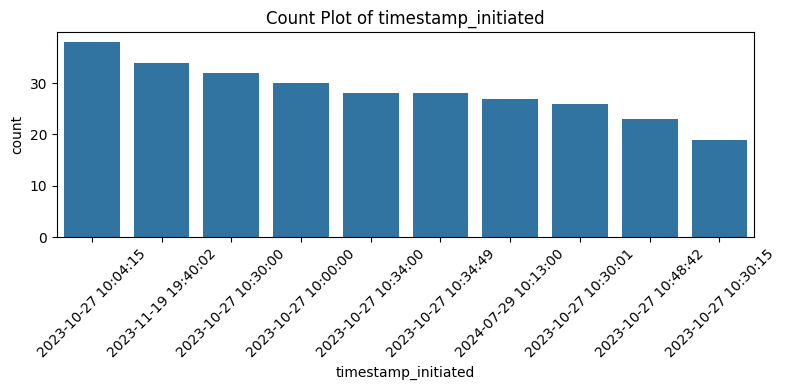

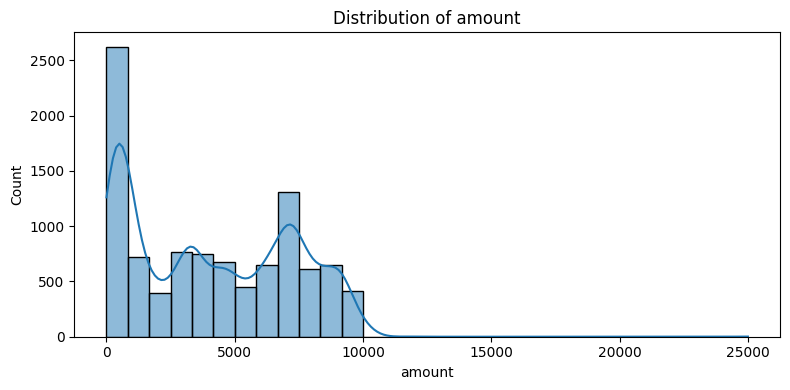

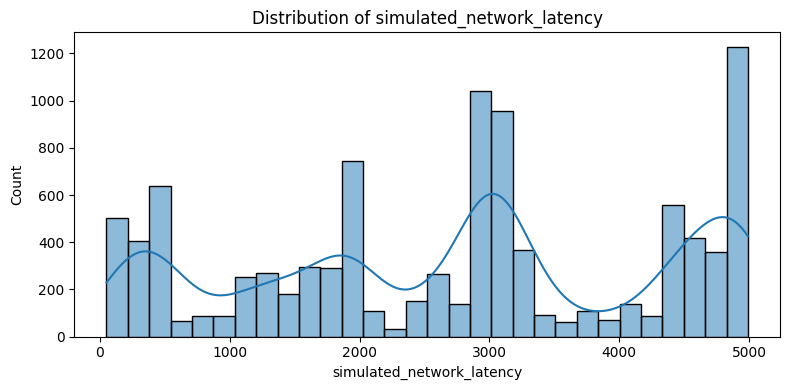

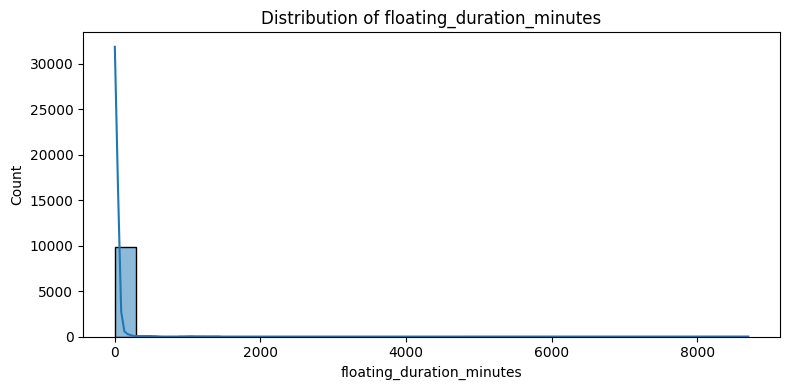

In [ ]:
df = pd.read_csv("transactions_fixed.csv")

# Display first few rows
print(df.head())

# Show basic info and summary
print(df.info())
print(df.describe())

# --- Visualization 1: Missing Data Matrix ---
plt.figure(figsize=(10, 4))
msno.matrix(df)
plt.title("Missing Data Matrix")
plt.show()

# --- Visualization 2: Heatmap of Correlation (for numeric columns only) ---
numeric_df = df.select_dtypes(include=['float64', 'int64'])
if not numeric_df.empty:
    plt.figure(figsize=(12, 8))
    sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title("Correlation Heatmap")
    plt.show()

# --- Visualization 3: Count Plot for Categorical Columns ---
categorical_cols = df.select_dtypes(include='object').columns.tolist()

for col in categorical_cols[:3]:  # Limit to first 3 categorical columns to avoid clutter
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index[:10])
    plt.title(f"Count Plot of {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# --- Visualization 4: Distribution Plot for Numeric Columns ---
for col in numeric_df.columns[:3]:  # Limit to first 3 numeric columns
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.tight_layout()
    plt.show()


In [ ]:
# If is_floating_cash is boolean (True/False)
floating_count = df['is_floating_cash'].sum()

# Total number of transactions
total_count = len(df)

print(f"Floating transactions: {floating_count} out of {total_count}")
print(f"Percentage: {floating_count / total_count:.2%}")


Floating transactions: 501 out of 10000
Percentage: 5.01%


In [ ]:
import numpy as np

# Step 1: Determine number of rows to modify (1%)
num_rows_to_modify = max(1, int(0.01 * len(df)))
rows_to_modify = df.sample(n=num_rows_to_modify, random_state=42)

# Step 2: Define how to split those into different durations
num_hours = int(0.70 * num_rows_to_modify)        # 70% -> hours
num_days = int(0.25 * num_rows_to_modify)         # 25% -> 1–2 days
num_long_days = num_rows_to_modify - (num_hours + num_days)  # Remaining ~5%

# Step 3: Generate random new durations (all in minutes)
new_durations = np.concatenate([
    np.random.randint(60, 600, size=num_hours),        # 1 to 10 hours
    np.random.randint(1440, 2880, size=num_days),      # 1 to 2 days
    np.random.randint(4320, 10080, size=num_long_days) # 3 to 7 days
])

# Shuffle to avoid patterns
np.random.shuffle(new_durations)

# Step 4: Inject new values into the DataFrame
df.loc[rows_to_modify.index, 'floating_duration_minutes'] = new_durations


In [ ]:
# Number of rows with floating_duration_minutes > 60 minutes (i.e., longer than 1 hour)
long_durations = (df['floating_duration_minutes'] > 60).sum()

# Total number of rows
total_rows = len(df)

# Print verification
print(f"{long_durations} out of {total_rows} rows have floating_duration_minutes > 60.")
print(f"That is approximately {long_durations / total_rows:.2%} of the dataset.")


379 out of 10000 rows have floating_duration_minutes > 60.
That is approximately 3.79% of the dataset.


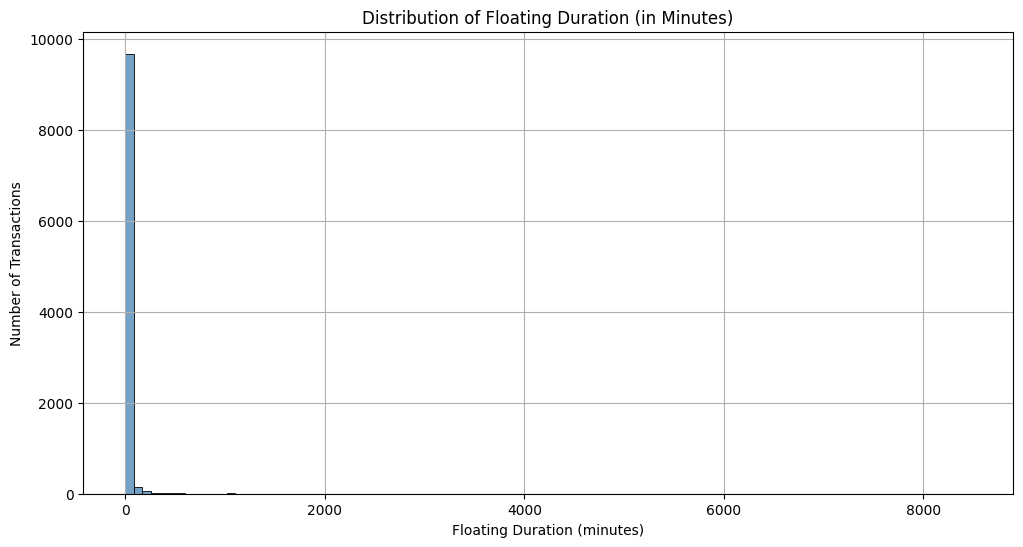

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.histplot(df['floating_duration_minutes'], bins=100, kde=False, color='steelblue')

plt.title("Distribution of Floating Duration (in Minutes)")
plt.xlabel("Floating Duration (minutes)")
plt.ylabel("Number of Transactions")
plt.grid(True)
plt.show()


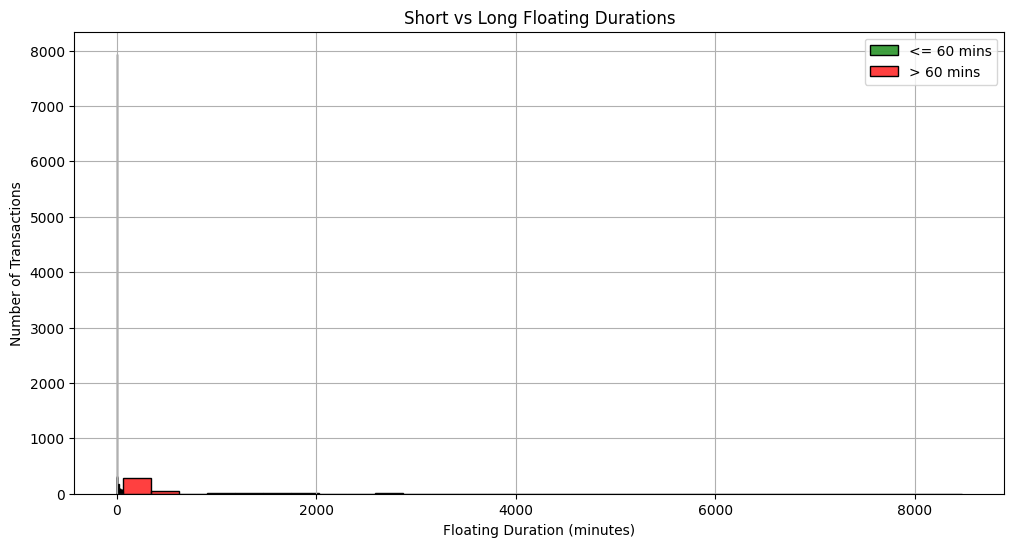

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(df[df['floating_duration_minutes'] <= 60]['floating_duration_minutes'],
             bins=30, color='green', label='<= 60 mins')
sns.histplot(df[df['floating_duration_minutes'] > 60]['floating_duration_minutes'],
             bins=30, color='red', label='> 60 mins')

plt.title("Short vs Long Floating Durations")
plt.xlabel("Floating Duration (minutes)")
plt.ylabel("Number of Transactions")
plt.legend()
plt.grid(True)
plt.show()


Dataset 'transactions.csv' loaded successfully for EDA.

--- Basic Dataset Information ---
Number of rows: 10000
Number of columns: 28

--- Column Data Types and Non-Null Counts ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 28 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   transaction_id                     10000 non-null  object 
 1   user_id                            10000 non-null  object 
 2   timestamp_initiated                10000 non-null  object 
 3   amount                             10000 non-null  float64
 4   transaction_type                   9897 non-null   object 
 5   recipient_type                     9999 non-null   object 
 6   recipient_account_id               9994 non-null   object 
 7   recipient_bank_name_or_ewallet     9883 non-null   object 
 8   device_id                          10000 non-null  object 
 9   l

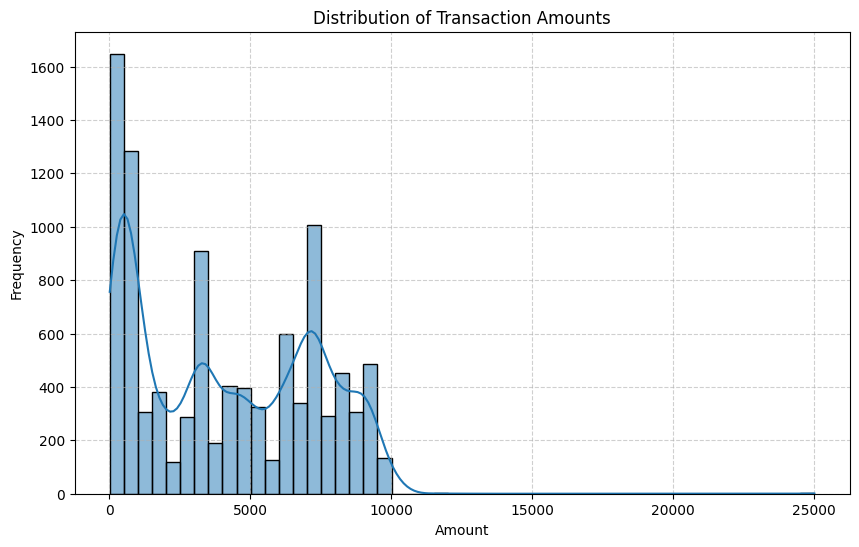


--- Distribution of 'simulated_network_latency' ---


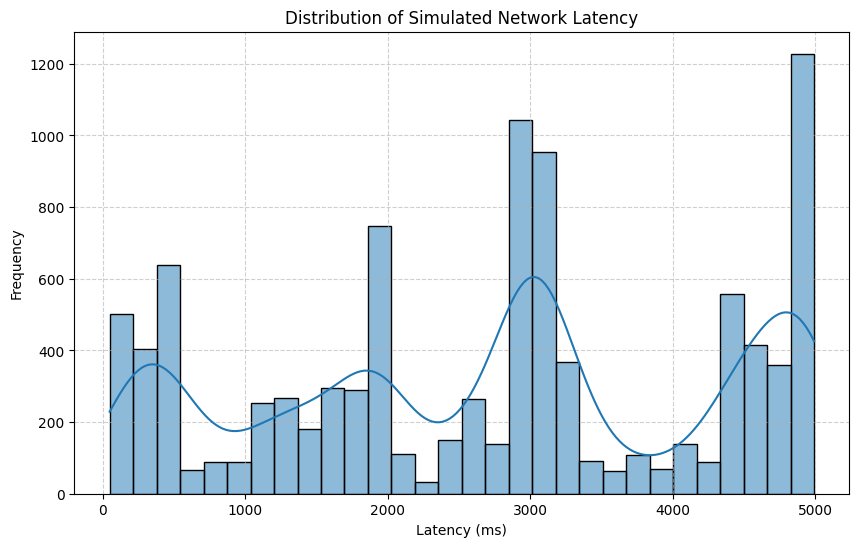


--- Correlation Matrix for Numerical Columns ---


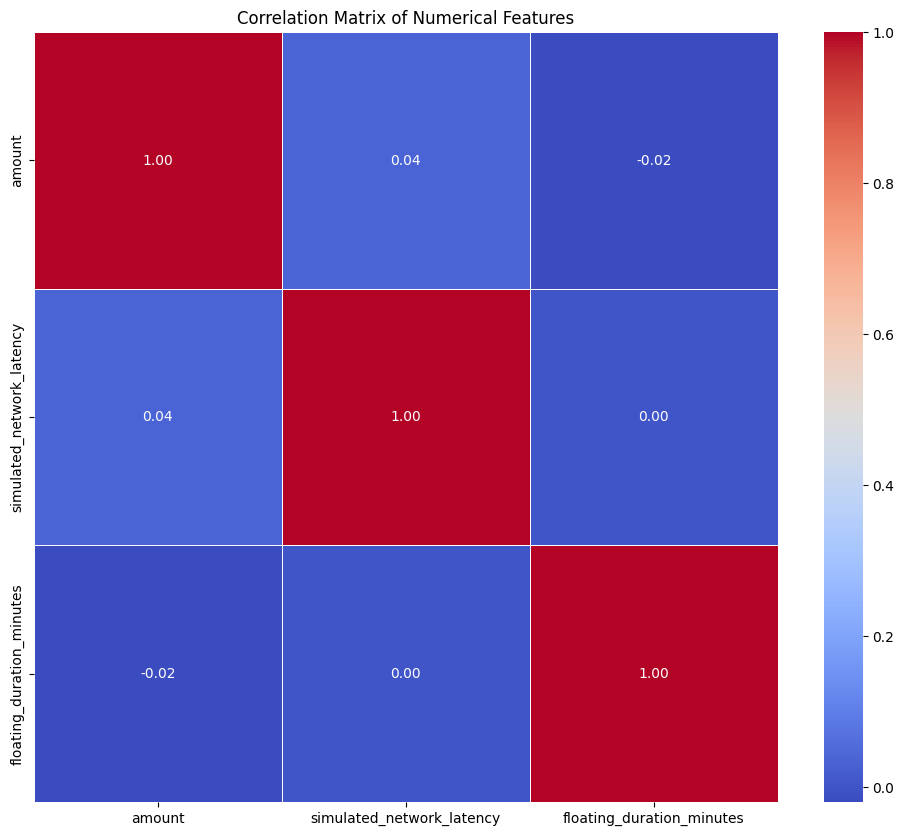


Correlation matrix displayed above. Values close to 1 or -1 indicate strong positive or negative correlation, respectively.

--- Visualizing Final Transaction Status Distribution ---


/tmp/ipython-input-47-1583170802.py:114: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='status_4', order=df['status_4'].value_counts().index, palette='viridis')


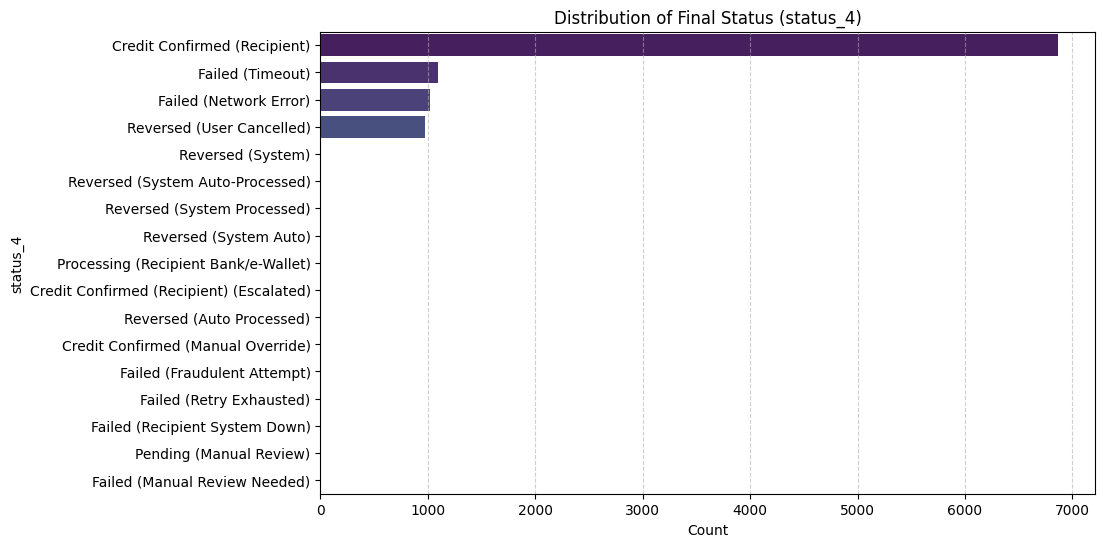


--- Visualizing Relationship between Final Status (status_4) and Anomaly/Failure Indicators ---


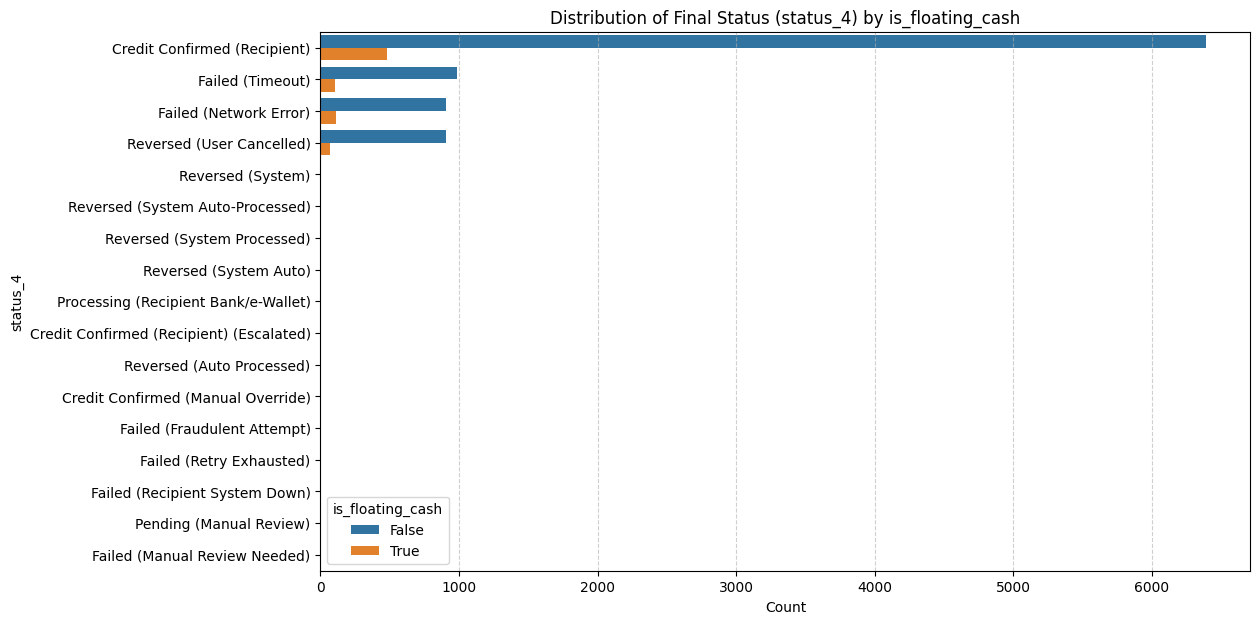

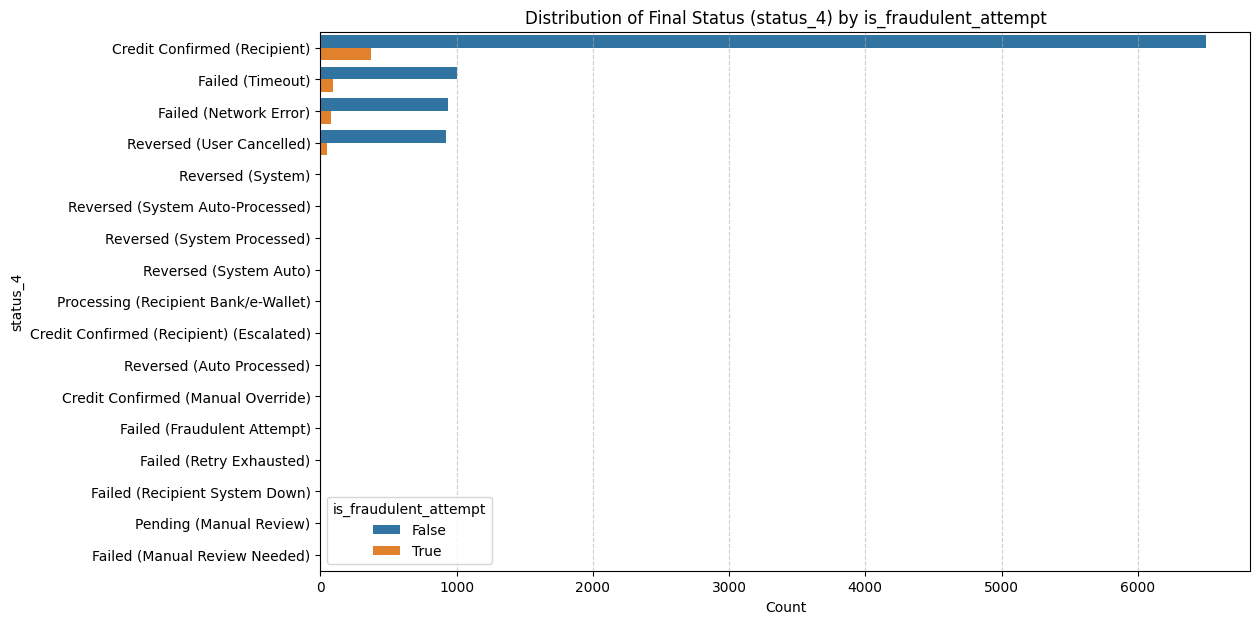

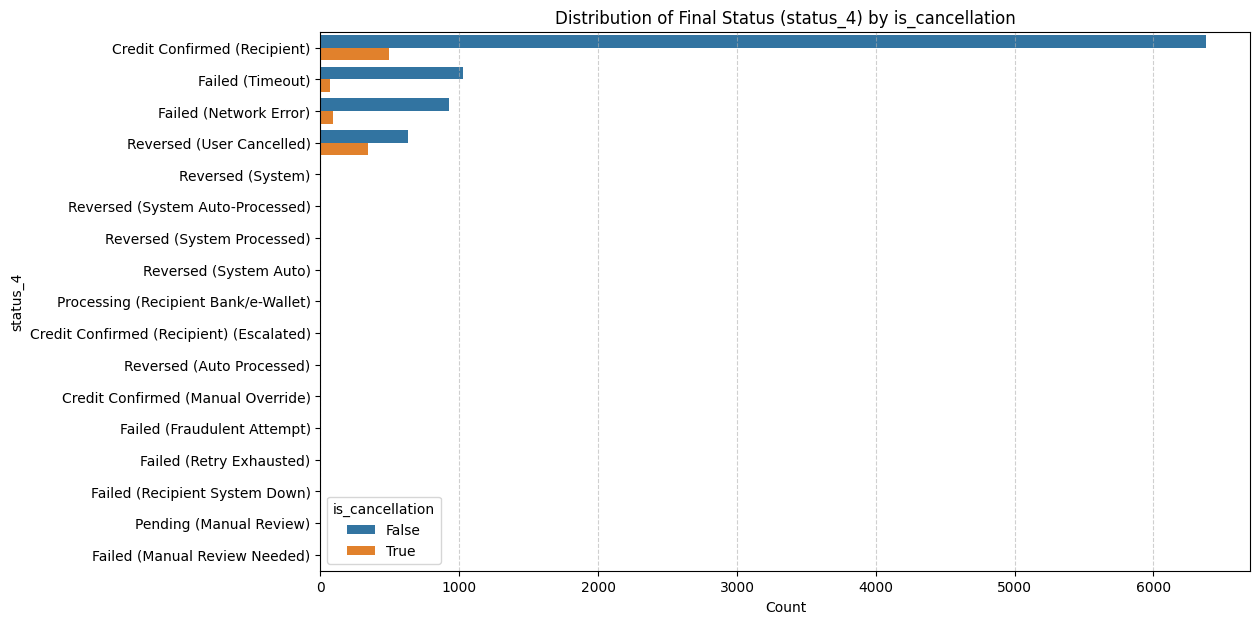

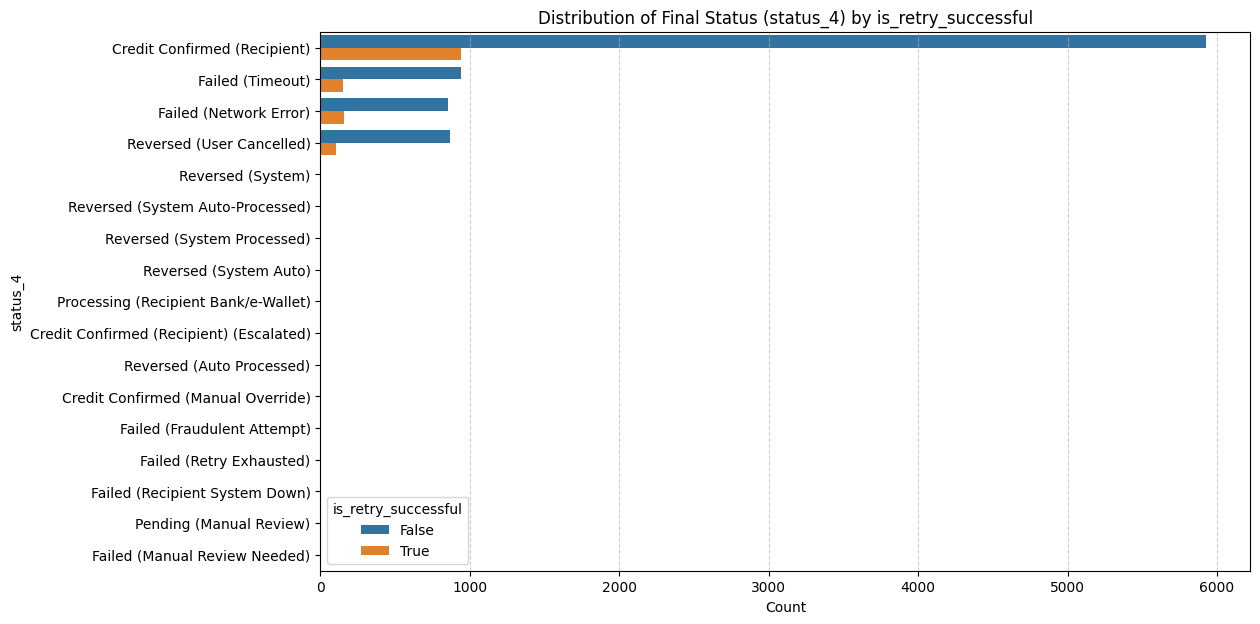

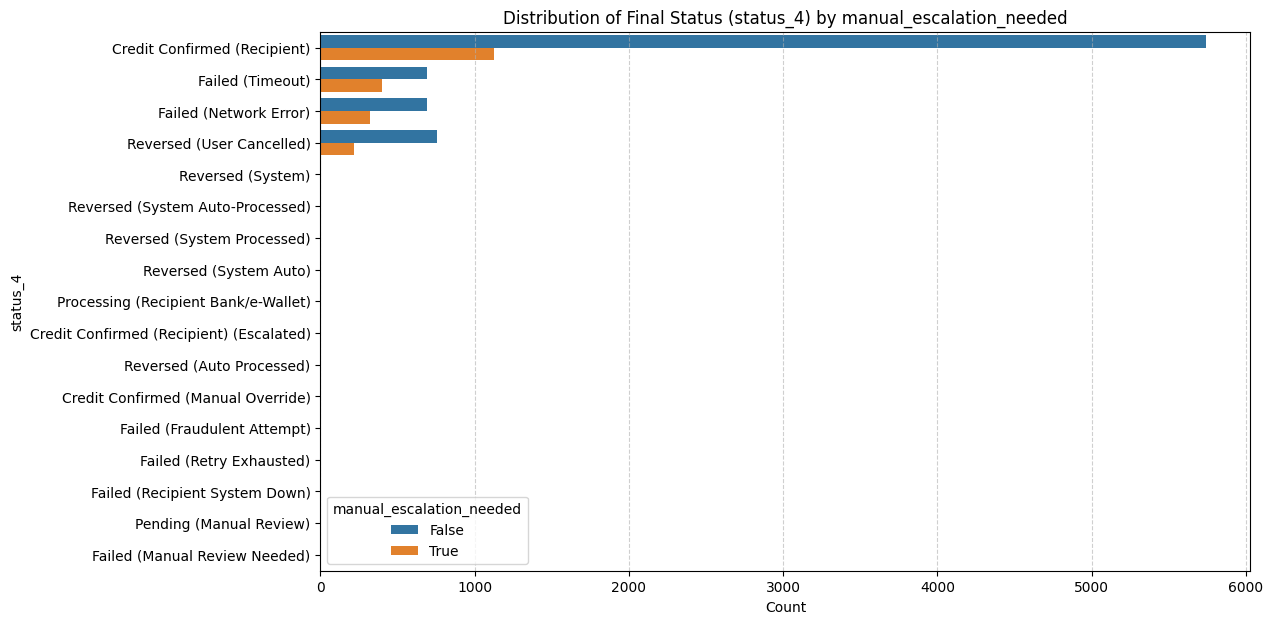


--- Visualizing Status Timestamps and Durations ---


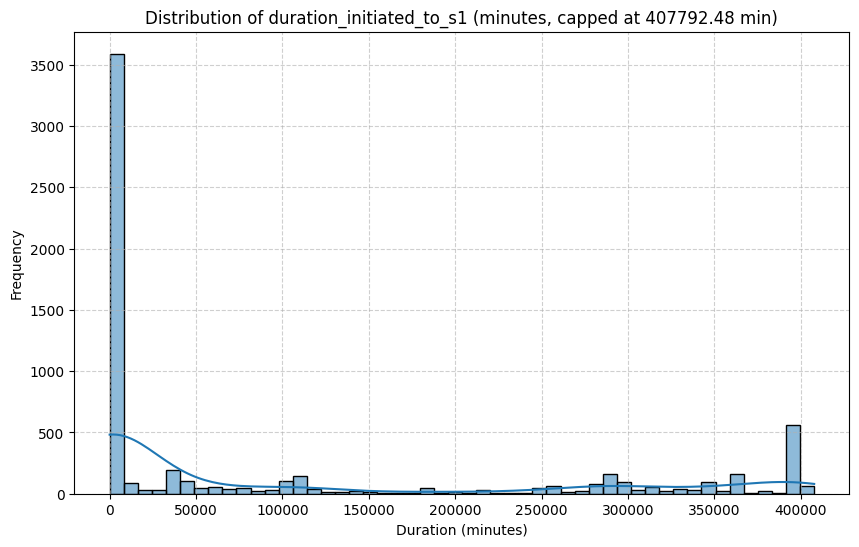

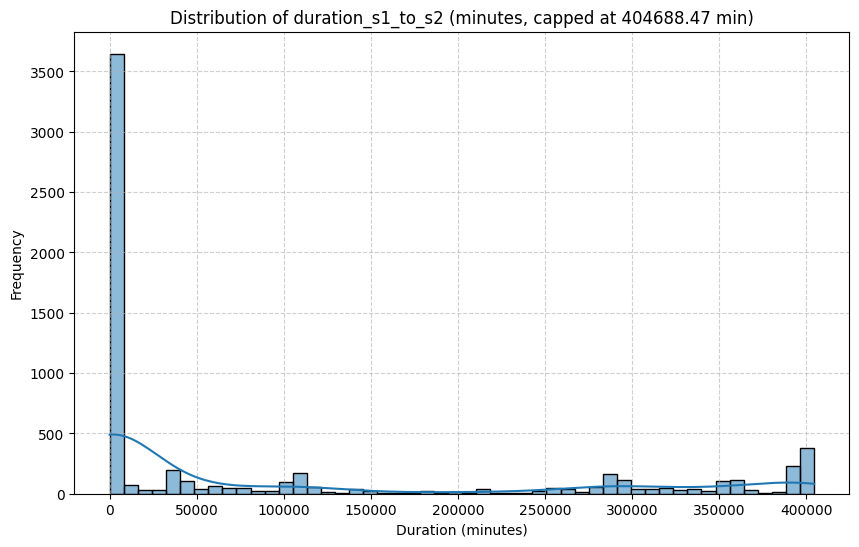

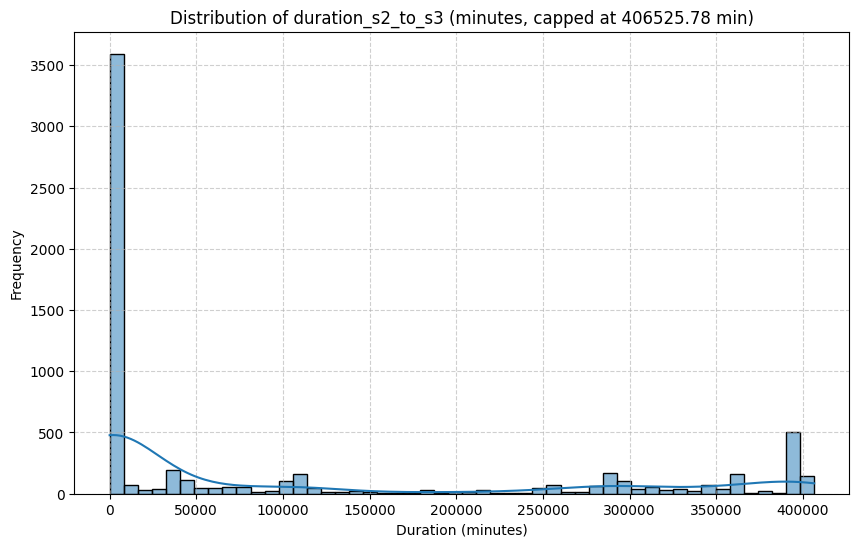

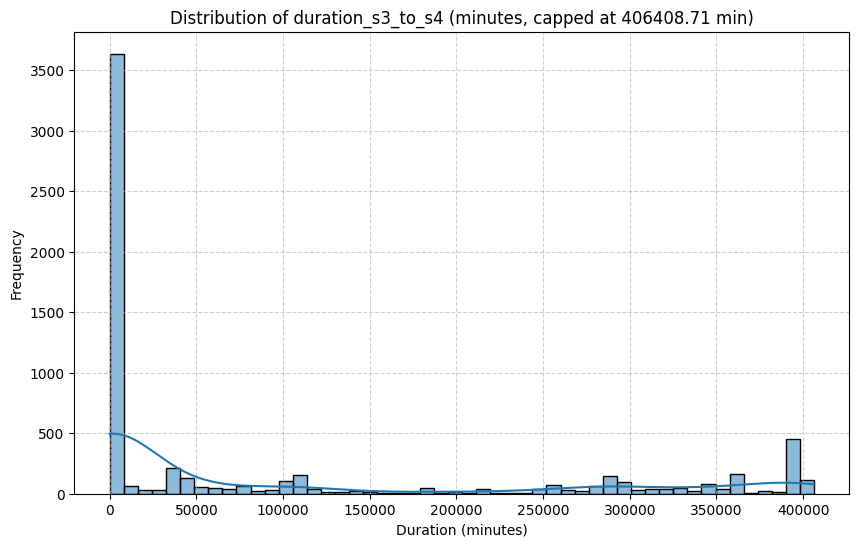

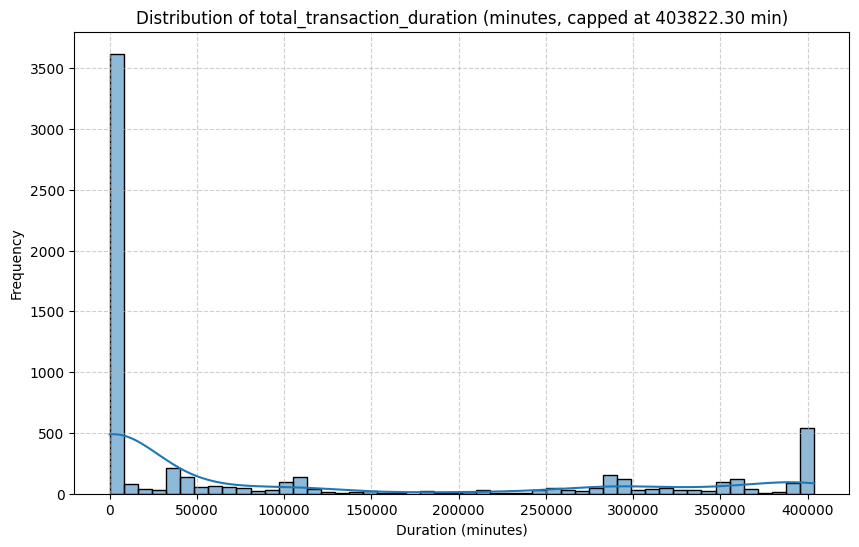

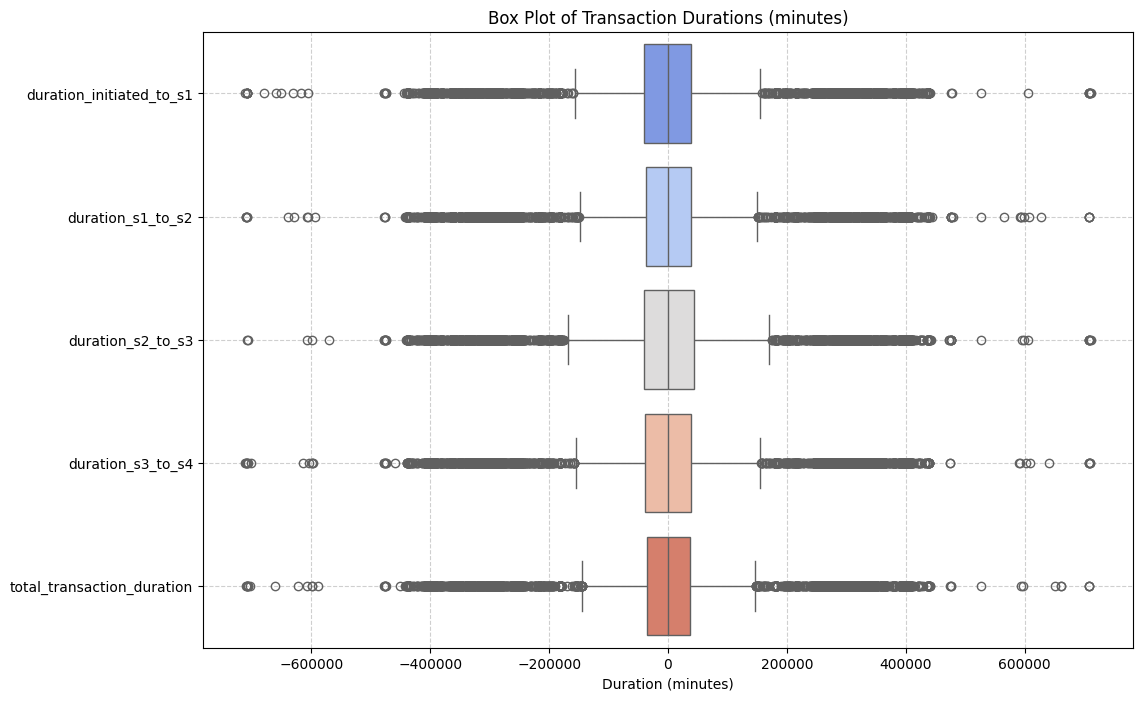


--- Consistency Checks: Statuses vs. Anomaly/Failure Indicators ---

Transactions where 'is_fraudulent_attempt' is True but 'status_4' is 'Credit Confirmed (Recipient)': 368
All 368 transactions in this category have a uniform status_4: 'Credit Confirmed (Recipient)'. No plot generated.

Transactions where 'status_4' is 'Failed (Fraudulent Attempt)' but 'is_fraudulent_attempt' is False: 2
All 2 transactions in this category have a uniform status_4: 'Failed (Fraudulent Attempt)'. No plot generated.

Transactions where 'is_cancellation' is True but 'status_4' is 'Credit Confirmed (Recipient)': 491
All 491 transactions in this category have a uniform status_4: 'Credit Confirmed (Recipient)'. No plot generated.

Transactions where 'status_4' is 'Reversed (User Cancelled)' but 'is_cancellation' is False: 629
All 629 transactions in this category have a uniform status_4: 'Reversed (User Cancelled)'. No plot generated.

Transactions where 'is_retry_successful' is True but 'status_4' is a Fai

/tmp/ipython-input-47-1583170802.py:291: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df[retry_failed_mask], y='status_4', order=df[retry_failed_mask]['status_4'].value_counts().index, palette='Purples')


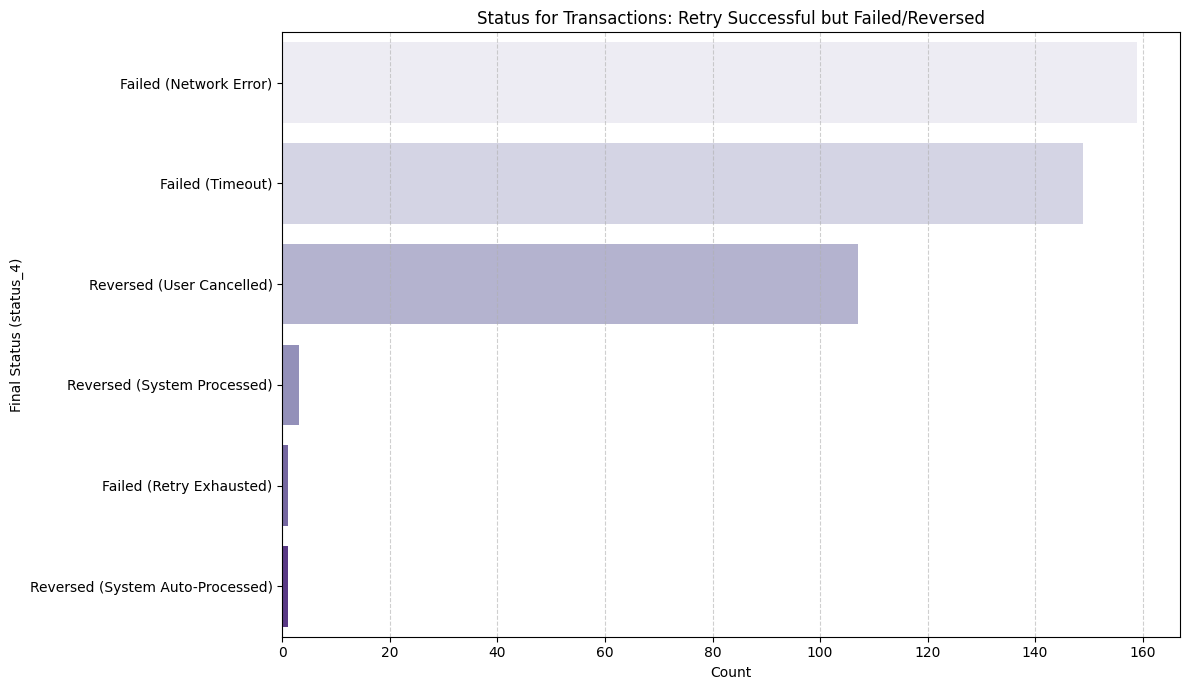


Transactions where 'manual_escalation_needed' is True, but 'status_4' is 'Credit Confirmed (Recipient)' without explicit escalation label: 1128
All 1128 transactions in this category have a uniform status_4: 'Credit Confirmed (Recipient)'. No plot generated.

Transactions where 'status_4' indicates manual review/escalation but 'manual_escalation_needed' is False: 3


/tmp/ipython-input-47-1583170802.py:336: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df[status_manual_no_flag_mask], y='status_4', order=df[status_manual_no_flag_mask]['status_4'].value_counts().index, palette='cool')


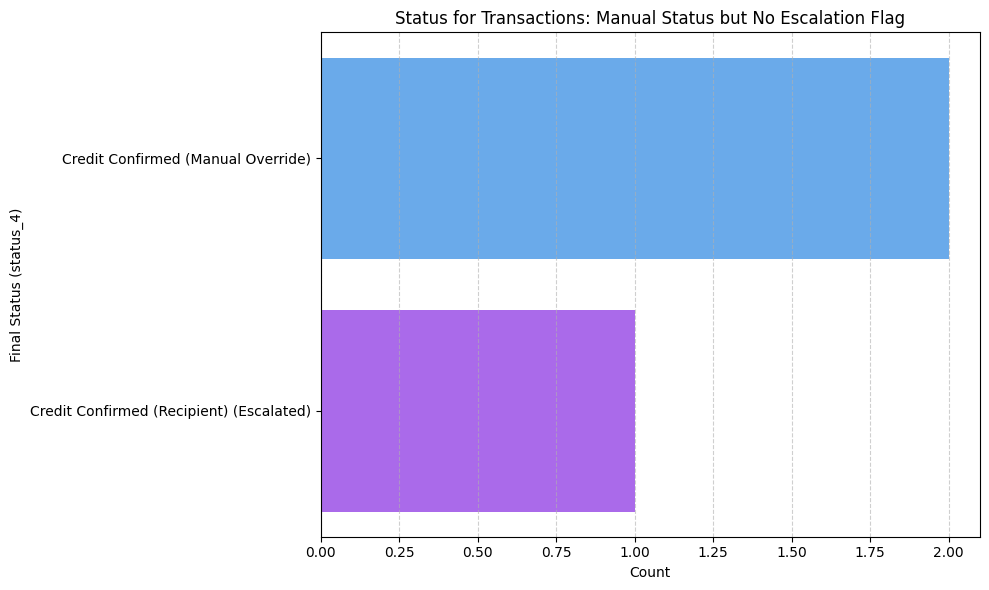

Dataset 'transactions.csv' loaded successfully.

--- Consistency Checks: Statuses vs. Anomaly/Failure Indicators ---
NOTE THAT THESE INCONSISTENCIES ARE OKAY. THEY REFLECT REAL-LIFE SCENARIOS

Transactions where 'is_fraudulent_attempt' is True but 'status_4' is 'Credit Confirmed (Recipient)': 368
Example (first 5):
| transaction_id                       | is_fraudulent_attempt   | status_4                     |
|:-------------------------------------|:------------------------|:-----------------------------|
| 3411b439-d3e8-4674-87d2-64f3d2f93d39 | True                    | Credit Confirmed (Recipient) |
| 5771d9d4-c947-4148-936b-67e411131168 | True                    | Credit Confirmed (Recipient) |
| 5b4a5585-30dd-4286-9a25-e21d3f9b252d | True                    | Credit Confirmed (Recipient) |
| ad8e0404-f5fe-4f11-9a70-8e5033878b66 | True                    | Credit Confirmed (Recipient) |
| 5ee85ee7-d86b-4e8c-8f2c-e5473d0cf3b1 | True                    | Credit Confirmed (Recipient)

In [ ]:
import pandas as pd
import numpy as np # Already imported in your other script, good practice to include if used here
import matplotlib.pyplot as plt # For plotting
import seaborn as sns # For enhanced plotting

# --- Instructions for Google Colab ---
# 1. Upload your 'transactions.csv' file to your Google Colab environment.
# 2. Run this code cell.
# 3. The output will be various print statements and plots providing insights into your data.

# Load the dataset
try:
    df = pd.read_csv('transactions.csv')
    print("Dataset 'transactions.csv' loaded successfully for EDA.")
except FileNotFoundError:
    print("Error: 'transactions.csv' not found. Please upload the file to Google Colab.")
    exit()

print("\n--- Basic Dataset Information ---")
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

print("\n--- Column Data Types and Non-Null Counts ---")
print(df.info())

print("\n--- Descriptive Statistics for Numerical Columns ---")
# Exclude boolean columns from describe as their stats are not meaningful here
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
# Filter out boolean columns if they are treated as numbers (e.g., 0/1)
boolean_cols = df.select_dtypes(include=bool).columns.tolist()
numerical_cols_filtered = [col for col in numerical_cols if col not in boolean_cols]

if numerical_cols_filtered:
    print(df[numerical_cols_filtered].describe().to_markdown(numalign="left", stralign="left"))
else:
    print("No numerical columns (excluding booleans) found for descriptive statistics.")


print("\n--- Checking for Duplicate Rows ---")
num_duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")
if num_duplicates > 0:
    print("Consider dropping duplicate rows if they are not intentional.")


print("\n--- Checking for Missing Values (Null/NaN) ---")
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({'Missing Count': missing_values, 'Missing Percentage (%)': missing_percentage})
missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values(by='Missing Count', ascending=False)

if not missing_df.empty:
    print(missing_df.to_markdown(numalign="left", stralign="left"))
    print("\nConsider strategies for handling missing values (e.g., imputation, removal) based on their percentage and importance.")
else:
    print("No missing values found in the dataset.")


print("\n--- Value Counts for Top Categorical Columns (Top 10) ---")
# Identify object (string) columns, excluding IDs which are usually unique
categorical_cols = df.select_dtypes(include='object').columns.tolist()
# Exclude ID columns if they are highly unique (e.g., more than 90% unique values)
id_cols_to_exclude = [col for col in categorical_cols if df[col].nunique() / len(df) > 0.9]
categorical_cols_filtered = [col for col in categorical_cols if col not in id_cols_to_exclude]

if categorical_cols_filtered:
    for col in categorical_cols_filtered:
        print(f"\nValue Counts for '{col}':")
        # Print top 10 values, or all if less than 10 unique values
        print(df[col].value_counts().head(10).to_markdown(numalign="left", stralign="left"))
else:
    print("No relevant categorical columns found for value counts.")


print("\n--- Distribution of 'amount' ---")
plt.figure(figsize=(10, 6))
sns.histplot(df['amount'], bins=50, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

print("\n--- Distribution of 'simulated_network_latency' ---")
plt.figure(figsize=(10, 6))
sns.histplot(df['simulated_network_latency'], bins=30, kde=True)
plt.title('Distribution of Simulated Network Latency')
plt.xlabel('Latency (ms)')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

print("\n--- Correlation Matrix for Numerical Columns ---")
# Select only numerical columns for correlation calculation
df_numerical = df.select_dtypes(include=np.number)
# Drop boolean columns from correlation if they are not truly numerical measures
df_numerical = df_numerical.drop(columns=boolean_cols, errors='ignore')

if not df_numerical.empty and df_numerical.shape[1] > 1:
    correlation_matrix = df_numerical.corr()
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title('Correlation Matrix of Numerical Features')
    plt.show()
    print("\nCorrelation matrix displayed above. Values close to 1 or -1 indicate strong positive or negative correlation, respectively.")
else:
    print("Not enough numerical columns (after filtering booleans) to compute a meaningful correlation matrix.")

# --- Visualizing Statuses and Anomaly/Failure Indicators ---

print("\n--- Visualizing Final Transaction Status Distribution ---")
# Only keeping status_4 distribution as it's the most relevant final status
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='status_4', order=df['status_4'].value_counts().index, palette='viridis')
plt.title('Distribution of Final Status (status_4)')
plt.xlabel('Count')
plt.ylabel('status_4')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()


print("\n--- Visualizing Relationship between Final Status (status_4) and Anomaly/Failure Indicators ---")
indicator_columns = [
    'is_floating_cash',
    'is_fraudulent_attempt',
    'is_cancellation',
    'is_retry_successful',
    'manual_escalation_needed'
]
for indicator in indicator_columns:
    plt.figure(figsize=(12, 7))
    sns.countplot(data=df, y='status_4', hue=indicator, order=df['status_4'].value_counts().index, palette='tab10')
    plt.title(f'Distribution of Final Status (status_4) by {indicator}')
    plt.xlabel('Count')
    plt.ylabel('status_4')
    plt.legend(title=indicator)
    plt.grid(axis='x', linestyle='--', alpha=0.6)
    plt.show()

# --- Visualizing Status Timestamps and Durations ---
print("\n--- Visualizing Status Timestamps and Durations ---")

# Convert timestamp columns to datetime objects for calculations
timestamp_cols = [
    'timestamp_initiated',
    'status_timestamp_1',
    'status_timestamp_2',
    'status_timestamp_3',
    'status_timestamp_4',
    'expected_completion_time'
]
for col in timestamp_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')

# Drop rows where any of the primary status timestamps are NaT for duration calculations
df_time_analysis = df.dropna(subset=['timestamp_initiated', 'status_timestamp_1', 'status_timestamp_2', 'status_timestamp_3', 'status_timestamp_4']).copy()

if not df_time_analysis.empty:
    # Calculate durations in minutes
    df_time_analysis['duration_initiated_to_s1'] = (df_time_analysis['status_timestamp_1'] - df_time_analysis['timestamp_initiated']).dt.total_seconds() / 60
    df_time_analysis['duration_s1_to_s2'] = (df_time_analysis['status_timestamp_2'] - df_time_analysis['status_timestamp_1']).dt.total_seconds() / 60
    df_time_analysis['duration_s2_to_s3'] = (df_time_analysis['status_timestamp_3'] - df_time_analysis['status_timestamp_2']).dt.total_seconds() / 60
    df_time_analysis['duration_s3_to_s4'] = (df_time_analysis['status_timestamp_4'] - df_time_analysis['status_timestamp_3']).dt.total_seconds() / 60
    df_time_analysis['total_transaction_duration'] = (df_time_analysis['status_timestamp_4'] - df_time_analysis['timestamp_initiated']).dt.total_seconds() / 60

    duration_cols = [
        'duration_initiated_to_s1',
        'duration_s1_to_s2',
        'duration_s2_to_s3',
        'duration_s3_to_s4',
        'total_transaction_duration'
    ]

    # Plot distributions of durations
    for col in duration_cols:
        plt.figure(figsize=(10, 6))
        # Filter out negative durations (already handled by previous fixing script but good for EDA robustness)
        # and extremely large outliers for better visualization
        filtered_data = df_time_analysis[df_time_analysis[col] >= 0][col]
        # Cap at 99th percentile to avoid extreme outliers distorting the histogram
        upper_bound = filtered_data.quantile(0.99)
        sns.histplot(filtered_data[filtered_data <= upper_bound], bins=50, kde=True)
        plt.title(f'Distribution of {col} (minutes, capped at {upper_bound:.2f} min)')
        plt.xlabel('Duration (minutes)')
        plt.ylabel('Frequency')
        plt.grid(True, linestyle='--', alpha=0.6)
        plt.show()

    # Optional: Box plots for durations to see spread and outliers
    plt.figure(figsize=(12, 8))
    sns.boxplot(data=df_time_analysis[duration_cols], orient='h', palette='coolwarm')
    plt.title('Box Plot of Transaction Durations (minutes)')
    plt.xlabel('Duration (minutes)')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

else:
    print("Not enough valid timestamp data to perform duration analysis.")


# --- Consistency Checks between Statuses and Anomaly/Failure Indicators ---
print("\n--- Consistency Checks: Statuses vs. Anomaly/Failure Indicators ---")

# 1. is_fraudulent_attempt consistency
# Inconsistency 1.1: is_fraudulent_attempt is True, but status_4 is 'Credit Confirmed (Recipient)'
fraud_success_mask = (df['is_fraudulent_attempt'] == True) & (df['status_4'] == 'Credit Confirmed (Recipient)')
num_fraud_success = fraud_success_mask.sum()
print(f"\nTransactions where 'is_fraudulent_attempt' is True but 'status_4' is 'Credit Confirmed (Recipient)': {num_fraud_success}")
if num_fraud_success > 0:
    # Check if there's more than one unique status to plot
    if df[fraud_success_mask]['status_4'].nunique() > 1:
        plt.figure(figsize=(8, 5))
        sns.countplot(data=df[fraud_success_mask], x='status_4', palette='Reds')
        plt.title('Status for Transactions: Fraudulent Attempt but Success')
        plt.xlabel('Final Status (status_4)')
        plt.ylabel('Count')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
    else:
        print(f"All {num_fraud_success} transactions in this category have a uniform status_4: '{df[fraud_success_mask]['status_4'].iloc[0]}'. No plot generated.")

# Inconsistency 1.2: status_4 is 'Failed (Fraudulent Attempt)', but is_fraudulent_attempt is False
status_fraud_no_flag_mask = (df['status_4'] == 'Failed (Fraudulent Attempt)') & (df['is_fraudulent_attempt'] == False)
num_status_fraud_no_flag = status_fraud_no_flag_mask.sum()
print(f"\nTransactions where 'status_4' is 'Failed (Fraudulent Attempt)' but 'is_fraudulent_attempt' is False: {num_status_fraud_no_flag}")
if num_status_fraud_no_flag > 0:
    if df[status_fraud_no_flag_mask]['status_4'].nunique() > 1:
        plt.figure(figsize=(8, 5))
        sns.countplot(data=df[status_fraud_no_flag_mask], x='status_4', palette='Oranges')
        plt.title('Status for Transactions: Failed Fraud but No Flag')
        plt.xlabel('Final Status (status_4)')
        plt.ylabel('Count')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
    else:
        print(f"All {num_status_fraud_no_flag} transactions in this category have a uniform status_4: '{df[status_fraud_no_flag_mask]['status_4'].iloc[0]}'. No plot generated.")


# 2. is_cancellation consistency
# Inconsistency 2.1: is_cancellation is True, but status_4 is 'Credit Confirmed (Recipient)'
cancel_success_mask = (df['is_cancellation'] == True) & (df['status_4'] == 'Credit Confirmed (Recipient)')
num_cancel_success = cancel_success_mask.sum()
print(f"\nTransactions where 'is_cancellation' is True but 'status_4' is 'Credit Confirmed (Recipient)': {num_cancel_success}")
if num_cancel_success > 0:
    if df[cancel_success_mask]['status_4'].nunique() > 1:
        plt.figure(figsize=(8, 5))
        sns.countplot(data=df[cancel_success_mask], x='status_4', palette='Blues')
        plt.title('Status for Transactions: Cancelled but Success')
        plt.xlabel('Final Status (status_4)')
        plt.ylabel('Count')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
    else:
        print(f"All {num_cancel_success} transactions in this category have a uniform status_4: '{df[cancel_success_mask]['status_4'].iloc[0]}'. No plot generated.")

# Inconsistency 2.2: status_4 is 'Reversed (User Cancelled)', but is_cancellation is False
status_cancel_no_flag_mask = (df['status_4'] == 'Reversed (User Cancelled)') & (df['is_cancellation'] == False)
num_status_cancel_no_flag = status_cancel_no_flag_mask.sum()
print(f"\nTransactions where 'status_4' is 'Reversed (User Cancelled)' but 'is_cancellation' is False: {num_status_cancel_no_flag}")
if num_status_cancel_no_flag > 0:
    if df[status_cancel_no_flag_mask]['status_4'].nunique() > 1:
        plt.figure(figsize=(8, 5))
        sns.countplot(data=df[status_cancel_no_flag_mask], x='status_4', palette='Greens')
        plt.title('Status for Transactions: Reversed Cancelled but No Flag')
        plt.xlabel('Final Status (status_4)')
        plt.ylabel('Count')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
    else:
        print(f"All {num_status_cancel_no_flag} transactions in this category have a uniform status_4: '{df[status_cancel_no_flag_mask]['status_4'].iloc[0]}'. No plot generated.")


# 3. is_retry_successful consistency
# Inconsistency 3.1: is_retry_successful is True, but status_4 is a 'Failed' or 'Reversed' status
failed_or_reversed_statuses = [
    'Failed (Timeout)', 'Failed (Network Error)', 'Failed (Retry Exhausted)',
    'Failed (Recipient System Down)', 'Failed (Fraudulent Attempt)', 'Failed (Manual Review Needed)',
    'Reversed (User Cancelled)', 'Reversed (System)', 'Reversed (System Auto-Processed)',
    'Reversed (System Processed)', 'Reversed (System Auto)', 'Reversed (Auto Processed)'
]
retry_failed_mask = (df['is_retry_successful'] == True) & (df['status_4'].isin(failed_or_reversed_statuses))
num_retry_failed = retry_failed_mask.sum()
print(f"\nTransactions where 'is_retry_successful' is True but 'status_4' is a Failed/Reversed status: {num_retry_failed}")
if num_retry_failed > 0:
    if df[retry_failed_mask]['status_4'].nunique() > 1:
        plt.figure(figsize=(12, 7))
        sns.countplot(data=df[retry_failed_mask], y='status_4', order=df[retry_failed_mask]['status_4'].value_counts().index, palette='Purples')
        plt.title('Status for Transactions: Retry Successful but Failed/Reversed')
        plt.xlabel('Count')
        plt.ylabel('Final Status (status_4)')
        plt.grid(axis='x', linestyle='--', alpha=0.6)
        plt.tight_layout()
        plt.show()
    else:
        print(f"All {num_retry_failed} transactions in this category have a uniform status_4: '{df[retry_failed_mask]['status_4'].iloc[0]}'. No plot generated.")


# 4. manual_escalation_needed consistency
# Inconsistency 4.1: manual_escalation_needed is True, but status_4 is 'Credit Confirmed (Recipient)'
# without explicit 'Escalated' or 'Manual Override' in the status label.
# This check is more nuanced as manual escalation can lead to success. We'll flag if it's just 'Credit Confirmed'
# and not one of the specific escalated success statuses.
escalation_success_no_explicit_mask = (
    (df['manual_escalation_needed'] == True) &
    (df['status_4'] == 'Credit Confirmed (Recipient)') &
    (~df['status_4'].isin(['Credit Confirmed (Recipient) (Escalated)', 'Credit Confirmed (Manual Override)']))
)
num_escalation_success_no_explicit = escalation_success_no_explicit_mask.sum()
print(f"\nTransactions where 'manual_escalation_needed' is True, but 'status_4' is 'Credit Confirmed (Recipient)' without explicit escalation label: {num_escalation_success_no_explicit}")
if num_escalation_success_no_explicit > 0:
    if df[escalation_success_no_explicit_mask]['status_4'].nunique() > 1:
        plt.figure(figsize=(8, 5))
        sns.countplot(data=df[escalation_success_no_explicit_mask], x='status_4', palette='Greys')
        plt.title('Status for Transactions: Manual Escalation but Generic Success')
        plt.xlabel('Final Status (status_4)')
        plt.ylabel('Count')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
    else:
        print(f"All {num_escalation_success_no_explicit} transactions in this category have a uniform status_4: '{df[escalation_success_no_explicit_mask]['status_4'].iloc[0]}'. No plot generated.")

# Inconsistency 4.2: status_4 indicates manual review/escalation, but manual_escalation_needed is False
status_manual_no_flag_mask = (
    df['status_4'].isin(['Pending (Manual Review)', 'Failed (Manual Review Needed)', 'Credit Confirmed (Recipient) (Escalated)', 'Credit Confirmed (Manual Override)'])
) & (df['manual_escalation_needed'] == False)
num_status_manual_no_flag = status_manual_no_flag_mask.sum()
print(f"\nTransactions where 'status_4' indicates manual review/escalation but 'manual_escalation_needed' is False: {num_status_manual_no_flag}")
if num_status_manual_no_flag > 0:
    if df[status_manual_no_flag_mask]['status_4'].nunique() > 1:
        plt.figure(figsize=(10, 6))
        sns.countplot(data=df[status_manual_no_flag_mask], y='status_4', order=df[status_manual_no_flag_mask]['status_4'].value_counts().index, palette='cool')
        plt.title('Status for Transactions: Manual Status but No Escalation Flag')
        plt.xlabel('Count')
        plt.ylabel('Final Status (status_4)')
        plt.grid(axis='x', linestyle='--', alpha=0.6)
        plt.tight_layout()
        plt.show()
    else:
        print(f"All {num_status_manual_no_flag} transactions in this category have a uniform status_4: '{df[status_manual_no_flag_mask]['status_4'].iloc[0]}'. No plot generated.")

import pandas as pd

# --- Instructions for Google Colab ---
# 1. Upload your 'transactions.csv' file to your Google Colab environment.
# 2. Run this code cell.
# 3. The output will be the requested tables in Markdown format.

# Load the dataset
try:
    df = pd.read_csv('transactions.csv')
    print("Dataset 'transactions.csv' loaded successfully.")
except FileNotFoundError:
    print("Error: 'transactions.csv' not found. Please upload the file to Google Colab.")
    exit()

print("\n--- Consistency Checks: Statuses vs. Anomaly/Failure Indicators ---")


print("NOTE THAT THESE INCONSISTENCIES ARE OKAY. THEY REFLECT REAL-LIFE SCENARIOS")
# 1. is_fraudulent_attempt consistency
# Inconsistency 1.1: is_fraudulent_attempt is True, but status_4 is 'Credit Confirmed (Recipient)'
fraud_success_mask = (df['is_fraudulent_attempt'] == True) & (df['status_4'] == 'Credit Confirmed (Recipient)')
num_fraud_success = fraud_success_mask.sum()
print(f"\nTransactions where 'is_fraudulent_attempt' is True but 'status_4' is 'Credit Confirmed (Recipient)': {num_fraud_success}")
if num_fraud_success > 0:
    print("Example (first 5):")
    print(df[fraud_success_mask][['transaction_id', 'is_fraudulent_attempt', 'status_4']].head(5).to_markdown(index=False, numalign="left", stralign="left"))

# Inconsistency 1.2: status_4 is 'Failed (Fraudulent Attempt)', but is_fraudulent_attempt is False
status_fraud_no_flag_mask = (df['status_4'] == 'Failed (Fraudulent Attempt)') & (df['is_fraudulent_attempt'] == False)
num_status_fraud_no_flag = status_fraud_no_flag_mask.sum()
print(f"\nTransactions where 'status_4' is 'Failed (Fraudulent Attempt)' but 'is_fraudulent_attempt' is False: {num_status_fraud_no_flag}")
if num_status_fraud_no_flag > 0:
    print("Example (first 5):")
    print(df[status_fraud_no_flag_mask][['transaction_id', 'is_fraudulent_attempt', 'status_4']].head(5).to_markdown(index=False, numalign="left", stralign="left"))


# 2. is_cancellation consistency
# Inconsistency 2.1: is_cancellation is True, but status_4 is 'Credit Confirmed (Recipient)'
cancel_success_mask = (df['is_cancellation'] == True) & (df['status_4'] == 'Credit Confirmed (Recipient)')
num_cancel_success = cancel_success_mask.sum()
print(f"\nTransactions where 'is_cancellation' is True but 'status_4' is 'Credit Confirmed (Recipient)': {num_cancel_success}")
if num_cancel_success > 0:
    print("Example (first 5):")
    print(df[cancel_success_mask][['transaction_id', 'is_cancellation', 'status_4']].head(5).to_markdown(index=False, numalign="left", stralign="left"))

# Inconsistency 2.2: status_4 is 'Reversed (User Cancelled)', but is_cancellation is False
status_cancel_no_flag_mask = (df['status_4'] == 'Reversed (User Cancelled)') & (df['is_cancellation'] == False)
num_status_cancel_no_flag = status_cancel_no_flag_mask.sum()
print(f"\nTransactions where 'status_4' is 'Reversed (User Cancelled)' but 'is_cancellation' is False: {num_status_cancel_no_flag}")
if num_status_cancel_no_flag > 0:
    print("Example (first 5):")
    print(df[status_cancel_no_flag_mask][['transaction_id', 'is_cancellation', 'status_4']].head(5).to_markdown(index=False, numalign="left", stralign="left"))


# 3. is_retry_successful consistency
# Inconsistency 3.1: is_retry_successful is True, but status_4 is a 'Failed' or 'Reversed' status
failed_or_reversed_statuses = [
    'Failed (Timeout)', 'Failed (Network Error)', 'Failed (Retry Exhausted)',
    'Failed (Recipient System Down)', 'Failed (Fraudulent Attempt)', 'Failed (Manual Review Needed)',
    'Reversed (User Cancelled)', 'Reversed (System)', 'Reversed (System Auto-Processed)',
    'Reversed (System Processed)', 'Reversed (System Auto)', 'Reversed (Auto Processed)'
]
retry_failed_mask = (df['is_retry_successful'] == True) & (df['status_4'].isin(failed_or_reversed_statuses))
num_retry_failed = retry_failed_mask.sum()
print(f"\nTransactions where 'is_retry_successful' is True but 'status_4' is a Failed/Reversed status: {num_retry_failed}")
if num_retry_failed > 0:
    print("Example (first 5):")
    print(df[retry_failed_mask][['transaction_id', 'is_retry_successful', 'status_4']].head(5).to_markdown(index=False, numalign="left", stralign="left"))


# 4. manual_escalation_needed consistency
# Inconsistency 4.1: manual_escalation_needed is True, but status_4 is 'Credit Confirmed (Recipient)'
# without explicit 'Escalated' or 'Manual Override' in the status label.
escalation_success_no_explicit_mask = (
    (df['manual_escalation_needed'] == True) &
    (df['status_4'] == 'Credit Confirmed (Recipient)') &
    (~df['status_4'].isin(['Credit Confirmed (Recipient) (Escalated)', 'Credit Confirmed (Manual Override)']))
)
num_escalation_success_no_explicit = escalation_success_no_explicit_mask.sum()
print(f"\nTransactions where 'manual_escalation_needed' is True, but 'status_4' is 'Credit Confirmed (Recipient)' without explicit escalation label: {num_escalation_success_no_explicit}")
if num_escalation_success_no_explicit > 0:
    print("Example (first 5):")
    print(df[escalation_success_no_explicit_mask][['transaction_id', 'manual_escalation_needed', 'status_4']].head(5).to_markdown(index=False, numalign="left", stralign="left"))

# Inconsistency 4.2: status_4 indicates manual review/escalation, but manual_escalation_needed is False
status_manual_no_flag_mask = (
    df['status_4'].isin(['Pending (Manual Review)', 'Failed (Manual Review Needed)', 'Credit Confirmed (Recipient) (Escalated)', 'Credit Confirmed (Manual Override)'])
) & (df['manual_escalation_needed'] == False)
num_status_manual_no_flag = status_manual_no_flag_mask.sum()
print(f"\nTransactions where 'status_4' indicates manual review/escalation but 'manual_escalation_needed' is False: {num_status_manual_no_flag}")
if num_status_manual_no_flag > 0:
    print("Example (first 5):")
    print(df[status_manual_no_flag_mask][['transaction_id', 'manual_escalation_needed', 'status_4']].head(5).to_markdown(index=False, numalign="left", stralign="left"))

print("\n--- EDA Complete ---")


In [ ]:
# Outlier checking

import pandas as pd
import numpy as np
from scipy.stats import zscore

df = pd.read_csv('transactions_fixed.csv')

# Define the outlier detection and impact assessment function
def detect_outliers(df, method='iqr', threshold=1.5, z_thresh=3):
    outlier_summary = {}

    for col in df.select_dtypes(include=np.number).columns:
        data = df[col].dropna()

        if method == 'iqr':
            Q1 = data.quantile(0.25)
            Q3 = data.quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - threshold * IQR
            upper_bound = Q3 + threshold * IQR
            outliers = data[(data < lower_bound) | (data > upper_bound)]

        elif method == 'zscore':
            z_scores = zscore(data)
            outliers = data[(np.abs(z_scores) > z_thresh)]

        # Impact on statistics
        mean_with = data.mean()
        std_with = data.std()
        median_with = data.median()

        clean_data = data[~data.isin(outliers)]
        mean_without = clean_data.mean()
        std_without = clean_data.std()
        median_without = clean_data.median()

        outlier_summary[col] = {
            'num_outliers': len(outliers),
            'percent_outliers': 100 * len(outliers) / len(data),
            'mean_with_outliers': mean_with,
            'mean_without_outliers': mean_without,
            'std_with_outliers': std_with,
            'std_without_outliers': std_without,
            'median_with_outliers': median_with,
            'median_without_outliers': median_without
        }

    return pd.DataFrame(outlier_summary).T

#  Run detection
results = detect_outliers(df, method='iqr')  # or method='zscore'

#  View result
print(results)


                           num_outliers  percent_outliers  mean_with_outliers  \
amount                              2.0              0.02         4100.256237   
simulated_network_latency           0.0              0.00         2731.750000   
floating_duration_minutes        2236.0             22.36           20.762600   

                           mean_without_outliers  std_with_outliers  \
amount                               4096.075452        3124.104808   
simulated_network_latency            2731.750000        1557.698190   
floating_duration_minutes               0.000000         210.930999   

                           std_without_outliers  median_with_outliers  \
amount                              3110.398671               3657.38   
simulated_network_latency           1557.698190               2941.00   
floating_duration_minutes              0.000000                  0.00   

                           median_without_outliers  
amount                                     3

In [ ]:
# Segmentation

import pandas as pd

# Load your dataset
df = pd.read_csv("transactions_fixed.csv")

# Check basic stats
q1 = df["floating_duration_minutes"].quantile(0.25)
q3 = df["floating_duration_minutes"].quantile(0.75)
iqr = q3 - q1
upper_fence = q3 + 1.5 * iqr

# Define segmentation logic
def segment_float_duration(x):
    if x <= q3:
        return "Low Float"
    elif x <= upper_fence:
        return "Medium Float"
    else:
        return "High Float"

# Apply segmentation
df["float_risk_segment"] = df["floating_duration_minutes"].apply(segment_float_duration)

# View result
print(df["float_risk_segment"].value_counts())
print(df[["floating_duration_minutes", "float_risk_segment"]].head())

# Optional: save segmented data
# df.to_csv("segmented_dataset.csv", index=False)


float_risk_segment
Low Float     7459
High Float    2131
Name: count, dtype: int64
   floating_duration_minutes float_risk_segment
0                        0.0          Low Float
1                        0.0          Low Float
2                        0.0          Low Float
3                       44.0         High Float
4                        0.0          Low Float
